In [1]:
library(tidyverse)
library(assertthat)
library(xtable)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘assertthat’

The following object is masked from ‘package:tibble’:

    has_name



In [2]:
plot_theme <- theme_classic() + 
    theme(strip.background = element_blank(),
          plot.title = element_text(hjust = 0.5),
          plot.subtitle = element_text(hjust = 0.5))

In [3]:
experiment_hash <- "9478936085490997477"

In [4]:
path <- paste0("../../data/output/single_classification_export/", experiment_hash, "_classifications.csv")
data <- read_csv(path, col_types = cols(.default = "i"))

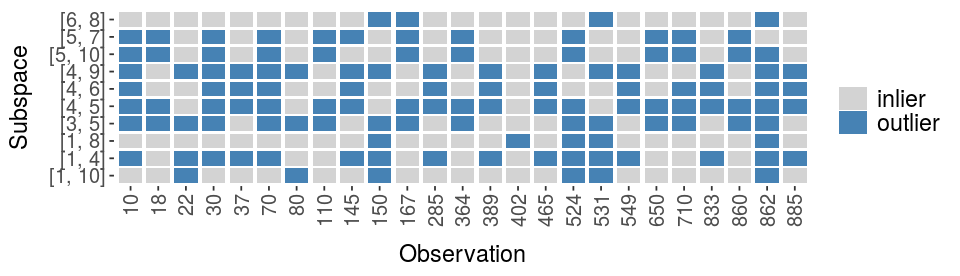

In [5]:
options(repr.plot.width=8, repr.plot.height=2.3)

data %>% 
    mutate(id = 1:n()) %>%
    filter(rowSums(select(., -id)) > 0) %>%
    gather(key="subspace", value="class", -id) %>%
    mutate(class = ifelse(class == 1, "outlier", "inlier")) %>%
ggplot(aes(factor(id), factor(subspace))) +
    geom_tile(aes(fill=class, width=0.85, height=0.85)) +
    labs(x="Observation", y="Subspace", fill="") +
    scale_fill_manual(values =c("lightgray", "steelblue")) +
    plot_theme + 
    theme(axis.line = element_blank(),
          axis.text.x = element_text(angle = 90, hjust = 1.0, vjust = 0.5),
          legend.key.width = unit(1.2, "line"),
          legend.key.height = unit(1, "line"),
          legend.text=element_text(size=14),
          axis.text=element_text(size=12),
          axis.title=element_text(size=14),
          axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
          axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)))

In [6]:
ggsave("../plots/classification_overview.pdf", 
       width = 7,
       height = 2.7,
       plot = last_plot(), device = "pdf")

In [7]:
path <- paste0("../single_classification_export/", experiment_hash, "_informativeness.csv")
data <- read_csv(path, col_types = cols(.default = "d"))